<h1><center>Laboratorio 6: El Pandas no Muerde (act III) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesores: Ignacio Meza, Gabriel Iturra
- Auxiliar: Sebastián Tinoco
- Ayudantes: Arturo Lazcano, Angelo Muñoz

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Mathias González Espinoza.
- Nombre de alumno 2: Eduardo Javier Silva Gaete.


### **Link de repositorio de GitHub:** [https://github.com/Zerzer0/MDS7202](https://github.com/Zerzer0/MDS7202)


## Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar los paradigmas y buenas prácticas de programación vistas hasta este momento.
- Comprender y aprovechar las ventajas que nos ofrece la liberia `numpy` con respecto a trabajar en Python 'puro'.
- Visualizar aplicaciones de filtros de imágenes sin el uso de librerías.
- Verificar que el uso indiscriminado de `for` puede afectar en la eficiencia en al procesar datos masivos.


El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [1]:
# pip install missingno

  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/93/fd/3f826c6d15d3bdcf65b8031e4835c52b7d9c45add25efa2314b53850e1a2/numpy-1.26.0-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/61.1 kB ? eta -:--:--
     ---------------------------------------- 0.0/61.1 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.1 kB ? eta -:--:--
     ------------------- ------------------ 30.7/61.1 kB 435.7 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/61.1 kB 525.1 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/61.1 kB 525.1 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/61.1 kB 525.1 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/61.1 kB 525.1 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/61.1 kB 525.1 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/61.1 kB 525.1 kB/s eta 0:00:01
     -------------

In [2]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
import datetime
from scipy import stats

from IPython.display import display, Markdown, Latex

#Libreria para plotear
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

In [ ]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except: 
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


# Segmentación de Clientes en Tienda de Retail 🛍️

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin Mora quien es el gerente de una cotizada tienda de retail en Europa, les solicita si pueden analizar los datos de algunas de sus tiendas y si es posible extraer los diferenciar los tipos de clientes que posee el retail.

Para esto, el área de ventas les entrega el archivo `online_retail_II.xlsx` con el que se les pide que cargue y visualicen algunas de las filas que componen el Dataset.

Realice una primera visualización de los datos y señale los atributos que componen el dataset. Señale las columnas que conforman el dataset, el tipo de variable presente en cada columna y comente que representa cada una de estas.

**Respuesta:** Los atributos que componen el dataframe son:

1. **Invoice**: Variable category que contiene el código de factura.
2. **StockCode**: Variable category que contiene el código del producto.
3. **Description**: Variable object que contiene el nombre del producto.
4. **Quantity**: Variable category que contiene la cantidad del producto.
5. **InvoiceDate**: Variable datetime que contiene la fecha de la factura.
6. **Price**: Varaible float que contiene el precio unitario del producto.
7. **Customer ID**: Variable category que contiene la identificación del cliente.
8. **Country**: Variable object que contiene el pais del comprador.

In [3]:
df_retail = pd.read_pickle("online_retail_II.pickle")
df_retail = df_retail.astype(
    {
        "Invoice": "category",
        "StockCode": "category",
        "Description": str,
        "Customer ID": "category",
    }
)
df_retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
df_retail.shape

(525461, 8)

In [10]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  category      
 1   StockCode    525461 non-null  category      
 2   Description  525461 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  category      
 7   Country      525461 non-null  object        
dtypes: category(3), datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 24.6+ MB


## 1.2 Análisis Explotatorio de los Datos [0.5 puntos] 

En base a la primera visualización del dataset, *Don Mora* le solicita que realicen un análisis exploratorio de los datos, para esto les deberán realizar un análisis univariado y multivariado. De la revisión, ustedes deben explicar potenciales anomalías visualizadas y señalar si existe la necesidad de realizar una limpieza de datos.

Explique a que nos referimos con análisis univariable, multivariable y de datos faltantes. ¿Qué beneficios nos otorga estudiar estos datos?. Sea conciso con su respuesta y no escriba mas de 5 líneas para su respuesta.

**Respuesta a la Pregunta:**

    El análisis univariable hace referencia al estudio de cada variable del dataset por si sola, a diferencia del análisis multivariable, en el cual se estudian dos o más variables de manera simultanea, observando las relaciones que existen entre si. Por último, el análisis de los datos faltantes se refiere al estudio de los valores 'Nan' en el dataset, si existe alguna relación entre ellos, entre otros.

### 1.2.1 Análisis Univariado [2 Puntos]

A continuación, se le presentan dos funciones para analizar los datos que componen un dataframe. La primera de estas es la función ``profile_serie()`` la cual recibe una serie y le entrega un análisis detallado de los datos que conforman dicha serie. 

Ejecute la funcion ``profile_serie()`` sobre cada serie para realizar un análisis univariado de estas. A continuación, comente acerca de el comportamiento de cada variable según las estadísticas descriptivas y los gráficos generados.

In [150]:
from pandas.api.types import is_numeric_dtype
from pandas.core.dtypes.common import is_datetime_or_timedelta_dtype


def profile_serie(serie_in, n_samples=1000, random_state=42):
    serie = serie_in.copy()

    profile = pd.Series(dtype='object')
    profile["Type"] = serie.dtype
    profile = pd.concat([profile, serie.describe(datetime_is_numeric=True)])

    # profile = pd.Series([])

    if is_numeric_dtype(serie):
        profile["Negative"] = (serie < 0).sum()
        profile["Negative (%)"] = (
            str(round((serie < 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Zeros"] = (serie == 0).sum()
        profile["Zeros (%)"] = (
            str(round((serie == 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Kurt"] = serie.kurt()
        profile["Skew"] = serie.skew()

    profile[" "] = " "  # espacio

    profile["Missing cells"] = serie.isnull().sum()
    profile["Missing cells (%)"] = (
        str(round(serie.isnull().sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Duplicate rows"] = serie.duplicated(False).sum()
    profile["Duplicate rows (%)"] = (
        str(round(serie.duplicated(False).sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Total size in memory"] = str(serie.memory_usage(index=True)) + " bytes"

    # profile = pd.concat([profile, description])

    profile = profile.rename(
        index={
            "count": "Number of observations",
            "mean": "Mean",
            "std": "Std",
            "min": "Min",
            "max": "Max",
            "unique": "Unique",
            "top": "Top",
            "freq": "Freq",
        }
    )
    no_outliers_fig = None

    if is_numeric_dtype(serie):

        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(
            sampled_serie, marginal="box", title=f"{serie.name} - With Outliers"
        )

        no_outliers = sampled_serie.loc[(np.abs(stats.zscore(sampled_serie)) < 3)]
        # zscore = https://es.wikipedia.org/wiki/Unidad_tipificada
        
        no_outliers_fig = px.histogram(
            no_outliers, marginal="box", title=f"{serie.name} - Without Outliers"
        )

    elif is_datetime_or_timedelta_dtype(serie):
        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(sampled_serie, marginal="box", title=f"{serie.name}")
    
    else:
        
        count = (
            serie.value_counts()[0:100]
            .reset_index()
            .rename(columns = {serie.name: 'Count'})
        )
        
        
        fig = px.bar(
            x=count['index'].astype(str),
            y=count["Count"],
            title=f"100 Most common categories of {serie.name}",
        )
    display(Markdown(f'## {serie.name} Profile'))
    display(profile)
    fig.show()

    if no_outliers_fig:
        no_outliers_fig.show()

    # return fig, profile

In [24]:
df_retail['Invoice'].name

'Invoice'

In [25]:
profile_serie(df_retail['Invoice']) 

## Invoice Profile

Type                           category
Number of observations           525461
Unique                            28816
Top                              537434
Freq                                675
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   517456
Duplicate rows (%)              98.48 %
Total size in memory      2338386 bytes
dtype: object

    Análisis de la Columna Invoice

De los resultados obtenidos se destaca que la variable Invoice es una variable categorica con 28816 valores unicos, además no posee valores Nan. Respecto del histograma realizado, se puede observar que la factura 537434 es la más repetida, por tanto esta es la factura en la cual más objetos se compraron.

In [26]:
profile_serie(df_retail['StockCode']) 

## StockCode Profile

Type                           category
Number of observations           525461
Unique                             4632
Top                              85123A
Freq                               3516
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525026
Duplicate rows (%)              99.92 %
Total size in memory      1220242 bytes
dtype: object

In [27]:
condicion = (df_retail['StockCode'] == '85123A')

df_retail[condicion]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
102,489442,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2009-12-01 09:46:00,2.95,13635.0,United Kingdom
147,489446,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2009-12-01 10:06:00,2.55,13758.0,United Kingdom
271,489465,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2009-12-01 10:52:00,2.55,13767.0,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
366,489517,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1,2009-12-01 11:34:00,2.95,16329.0,United Kingdom
...,...,...,...,...,...,...,...,...
524412,538086,85123A,WHITE HANGING HEART T-LIGHT HOLDER,14,2010-12-09 14:44:00,2.95,12872.0,United Kingdom
524519,538095,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1,2010-12-09 14:55:00,2.95,17097.0,Spain
524733,538145,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-09 16:08:00,2.95,15211.0,United Kingdom
525223,538157,85123A,WHITE HANGING HEART T-LIGHT HOLDER,4,2010-12-09 16:57:00,2.95,17576.0,United Kingdom


    Análisis de la Columna StockCode

De los resultados obtenidos se destaca que la variable StockCode es una variable categorica con 4632 valores unicos, que indica la cantidad de objetos unicos que posee el retail. Además esta variable no posee valores Nan. 

Respecto del histograma realizado, se puede observar que el código '85123A' es el más repetido, por tanto este es el objeto más comprado, que corresponde al objeto 'WHITE HANGING HEART T-LIGHT HOLDER'.

In [28]:
profile_serie(df_retail['Description']) 

## Description Profile

Type                                                  object
Number of observations                                525461
Unique                                                  4682
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3549
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        525198
Duplicate rows (%)                                   99.95 %
Total size in memory                           4203816 bytes
dtype: object

   Análisis de la Columna Description

   En la variable Description se aprecia que existen 4682 valores unicos y no hay valores Nan. Por otro lado en el gráfico se observa que la descripción 'WHITE HANGING HEART T-LIGHT HOLDER' es la más repetitiva, tal como se descubrio anteriormente en la variable StockCode.

In [30]:
profile_serie(df_retail['Quantity']) 

## Quantity Profile

Type                              int64
Number of observations         525461.0
Mean                          10.337667
Std                           107.42411
Min                             -9600.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                             19152.0
Negative                          12326
Negative (%)                     2.35 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        6277.666908
Skew                          36.044617
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525122
Duplicate rows (%)              99.94 %
Total size in memory      4203816 bytes
dtype: object

    Análisis de la Columna Quantity

   De los resultados obtenidos se debe destacar que un 2.35% de los valores de Quantity son negativos y no hay valores nulos. Del grafico se observa que los datos se concentran mayormente entre 1 y 12, siendo el promedio de compra 10 y la mediana 3. Por otro lado existe una gran cantidad de outliers fuera de este rango entre 1 y 12, por lo cual resulta de una desviación alta en los resultados, igual a 107.42.

In [31]:
profile_serie(df_retail['InvoiceDate']) 

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           525461
Mean                      2010-06-28 11:37:36.845017856
Min                                 2009-12-01 07:45:00
25%                                 2010-03-21 12:20:00
50%                                 2010-07-06 09:51:00
75%                                 2010-10-15 12:45:00
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   520400
Duplicate rows (%)                              99.04 %
Total size in memory                      4203816 bytes
dtype: object

    Análisis de la Columna InvoiceDate

Del grafico realizado se aprecia que todas las compras fueron realizadas entre el 1 de diciembre del 2009 y el 9 de diciembre del 2010, donde existe un peak de compras el mes de noviembre del 2010. Cabe destacar que no existen outliers en la muestra y tampoco valores nulos.
   

In [10]:
profile_serie(df_retail['Price']) 

## Price Profile

Type                            float64
Number of observations         525461.0
Mean                           4.688834
Std                          146.126914
Min                           -53594.36
25%                                1.25
50%                                 2.1
75%                                4.21
Max                            25111.09
Negative                              3
Negative (%)                      0.0 %
Zeros                              3687
Zeros (%)                         0.7 %
Kurt                       64868.344873
Skew                        -140.768446
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   524485
Duplicate rows (%)              99.81 %
Total size in memory      4203816 bytes
dtype: object

    Análisis de la Columna Price

De los resultados obtenidos se aprecia que existen 3 valores negativos y 3687 valores igual a cero. Por otro lado, del gráfico se observa que los precios se comportan similar a una distribución normal, donde la mayoria se concentra de 0 a 8.5, con una media de 4.6 y una mediana de 2.1. Además existen varios outliers fuera de este intervalo.

In [32]:
profile_serie(df_retail['Customer ID']) 

## Customer ID Profile

Type                           category
Number of observations         417534.0
Unique                           4383.0
Top                             14911.0
Freq                             5710.0
                                       
Missing cells                    107927
Missing cells (%)               20.54 %
Duplicate rows                   525327
Duplicate rows (%)              99.97 %
Total size in memory      1218250 bytes
dtype: object

    Análisis de la Columna Customer ID

Se puede observar en la variable Customer ID que existen 4383 valores unicos, que corresponde a la cantidad de compradores unicos. Además se aprecia que el 20.54% de los datos es nulo. Por otro lado, en el gráfico se observa que los compradores 14911, 17841 y 14606 son por lejos los compradores más recurrentes del retail.
  
  


In [33]:
profile_serie(df_retail['Country']) 

## Country Profile

Type                              object
Number of observations            525461
Unique                                40
Top                       United Kingdom
Freq                              485852
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    525461
Duplicate rows (%)               100.0 %
Total size in memory       4203816 bytes
dtype: object

    Análisis de la Columna Country

De los resultados obtenidos se aprecia que existen 40 variables unicas, es decir existen 40 paises que han comprado en este retail. Además no hay valores nulos. Respecto al gráfico, se observa que casi todas las compras fueron realizadas en 'United Kingdom'

### 1.2.2 Análisis Multivariado y Datos Faltantes [1 ptos]

En segundo lugar encontrará la función ``profile_df()`` que recibe un dataframe como entrada y realiza un análisis bivariado de todas las variables numéricas que conforman el dataframe, un analisis de la correlación de Pearson entre las variables numericas del dataframe y la matriz de datos faltantes. Ejecute la función `profile_df` y comente sus resultados.

In [151]:
def profile_df(dataframe_in):
    df = dataframe_in.copy()

    list_type = []
    for col in list(df.columns):
        if is_numeric_dtype(df[col]) or \
        pd.core.dtypes.common.is_datetime_or_timedelta_dtype(df[col]):
            list_type.append(col)

    
    display(Markdown('## Bivariant Analysis:'))
    for i in range(len(list_type)):
        for j in range(i+1, len(list_type)):
            plt.scatter(df[list_type[i]], df[list_type[j]])
            plt.xlabel(list_type[i]) 
            plt.ylabel(list_type[j]) 
            plt.title(f"{list_type[i]} v/s {list_type[j]}")
            plt.show()

    display(Markdown('## Correlation:'))
    fig_corr = px.imshow(df[list_type].corr())
    fig_corr.show()

    display(Markdown('## Missing Matrix:'))
    fig, ax = plt.subplots(figsize=[15, 10])
    msno.matrix(df, ax=ax, sparkline=False)

## Bivariant Analysis:

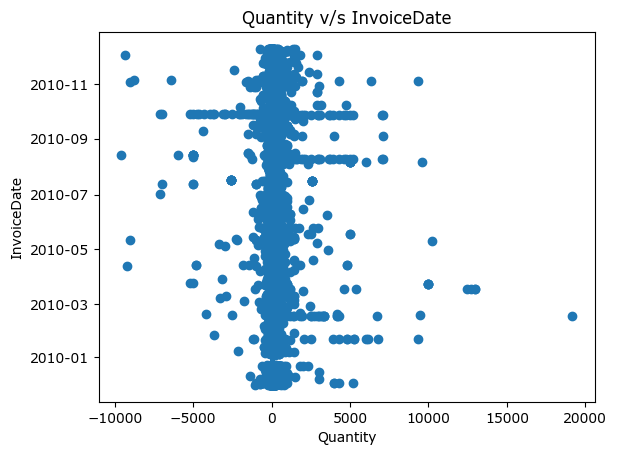

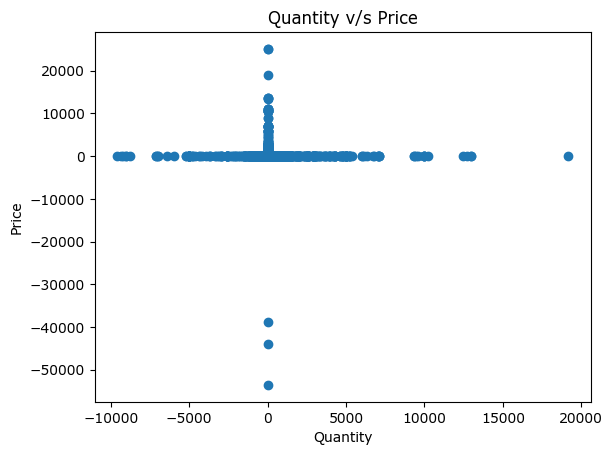

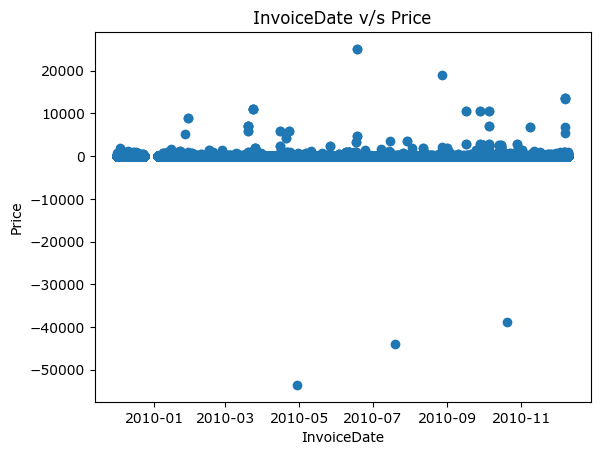

## Correlation:

## Missing Matrix:

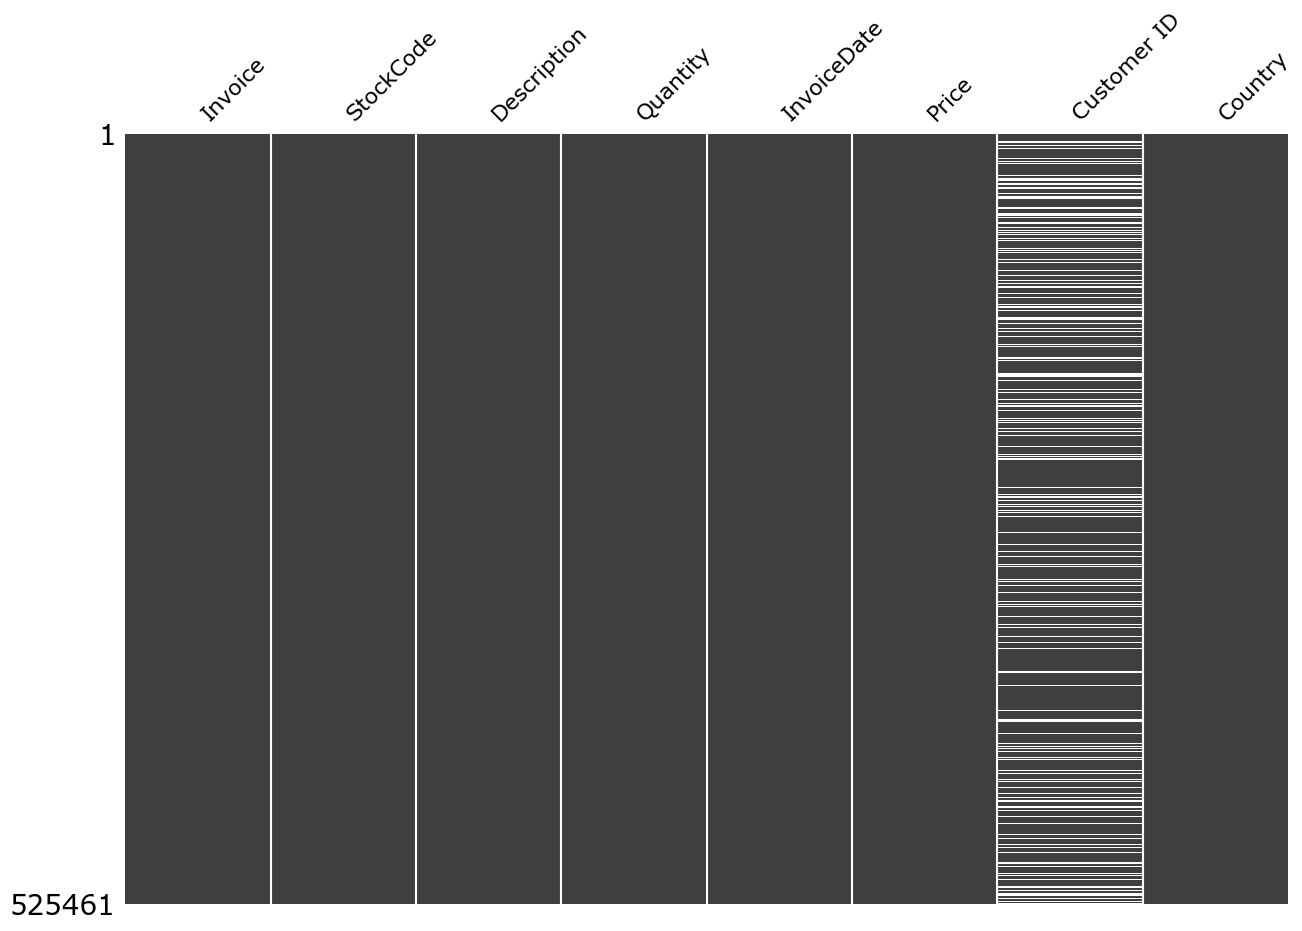

In [12]:
profile_df(df_retail)

Al observar los tres scatter plot en los cuale se comparan las variables Price, Quantity e invoiceDate se aprecia que:

- En el gráfico Quantity v/s InvoiceDate se observa que a lo largo del tiempo la mayoria de la cantidad de compras realizadas se concentra en cero.

- En el gráfico Quantity v/s Price se aprecia que la mayoria de los objetos comprados son con un precio cercano a cero. Además se observa errores en los datos, puesto que existen tanto precios como cantidades negativas.

- En el gráfico InvoiceDate v/s Price se aprecia que a lo largo del tiempo la mayoria de los precios de las ventas efectuadas fueron cercanos a cero. Por otro lado se observan tres precios negativos, indicando el error anteriormente mencionado.

Por otro parte, en la matriz de pearson se observa que no existe correlación alguna entre Quantity y Price.

Finalmente en la Matriz de valores nulos, se observa que existe una gran cantidad de ellos en la variable Customer ID, además de ser la unica variable que tiene estos valores nulos.


### 1.2.3 Limpieza de Datos [1 pto]

Como pudo ver en las secciones anteriores, los datos presentan valores erroneos, es por esto que se le solicita que genere una función que permita limpiar el dataset. Realice esta función en base observaciones propias y considere como imposible tener cantidades negativas en las ventas.

Una vez realizada la función, realice nuevamente el análisis exploratorio y comente las principales diferencias.

**Respuesta:** Para la limpieza de datos, se consideró eliminar todos los datos nulos y repetidos, además de condicionar los valores de 'Quantity' para mayores o igual a 0, y los valores de 'Price' para que sean extrictamente mayores que 0.

In [148]:
def limpieza_dataframe(dataframe):
    """Función que limpia los datos de un dataframe ingresado.

    Args:
        dataframe (Dataframe): Dataframe a cual se le quiere realizar una limpieza de datos.

    Returns:
        Dataframe: Dataframe que contiene el dataframe ingresado limpio de datos duplicados, valores NaN, y con valores
        positivos en 'Quantity' y 'Price'
    """
    df = dataframe.copy()

    df = df[(df['Quantity'] >= 0) & (df['Price'] > 0)]
    df = df.dropna().drop_duplicates()

    return df

In [154]:
df_limpio = limpieza_dataframe(df_retail)
df_limpio

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [156]:
profile_serie(df_limpio['Invoice'])

## Invoice Profile

Type                           category
Number of observations           400947
Unique                            19215
Top                              500356
Freq                                251
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   399217
Duplicate rows (%)              99.57 %
Total size in memory      5296806 bytes
dtype: object

In [157]:
profile_serie(df_limpio['StockCode'])

## StockCode Profile

Type                           category
Number of observations           400947
Unique                             4017
Top                              85123A
Freq                               3107
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   400785
Duplicate rows (%)              99.96 %
Total size in memory      4178662 bytes
dtype: object

In [158]:
profile_serie(df_limpio['Description'])

## Description Profile

Type                                                  object
Number of observations                                400947
Unique                                                  4444
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3107
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        400741
Duplicate rows (%)                                   99.95 %
Total size in memory                           6415152 bytes
dtype: object

In [159]:
profile_serie(df_limpio['Quantity'])

## Quantity Profile

Type                              int64
Number of observations         400947.0
Mean                          13.768523
Std                           97.639816
Min                                 1.0
25%                                 2.0
50%                                 5.0
75%                                12.0
Max                             19152.0
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        9417.083923
Skew                          79.272908
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   400833
Duplicate rows (%)              99.97 %
Total size in memory      6415152 bytes
dtype: object

In [160]:
profile_serie(df_limpio['InvoiceDate'])

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           400947
Mean                      2010-07-01 04:56:11.466452992
Min                                 2009-12-01 07:45:00
25%                                 2010-03-26 13:13:00
50%                                 2010-07-09 10:26:00
75%                                 2010-10-14 13:57:00
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   399480
Duplicate rows (%)                              99.63 %
Total size in memory                      6415152 bytes
dtype: object

In [161]:
profile_serie(df_limpio['Price'])

## Price Profile

Type                            float64
Number of observations         400947.0
Mean                           3.305571
Std                           35.046376
Min                                 0.0
25%                                1.25
50%                                1.95
75%                                3.75
Max                             10953.5
Negative                              0
Negative (%)                      0.0 %
Zeros                                31
Zeros (%)                        0.01 %
Kurt                       62823.652566
Skew                         233.151773
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   400761
Duplicate rows (%)              99.95 %
Total size in memory      6415152 bytes
dtype: object

In [162]:
profile_serie(df_limpio['Customer ID'])

## Customer ID Profile

Type                           category
Number of observations         400947.0
Unique                           4314.0
Top                             14911.0
Freq                             5568.0
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   400854
Duplicate rows (%)              99.98 %
Total size in memory      4176670 bytes
dtype: object

In [163]:
profile_serie(df_limpio['Country'])

## Country Profile

Type                              object
Number of observations            400947
Unique                                37
Top                       United Kingdom
Freq                              364255
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    400947
Duplicate rows (%)               100.0 %
Total size in memory       6415152 bytes
dtype: object

## Bivariant Analysis:

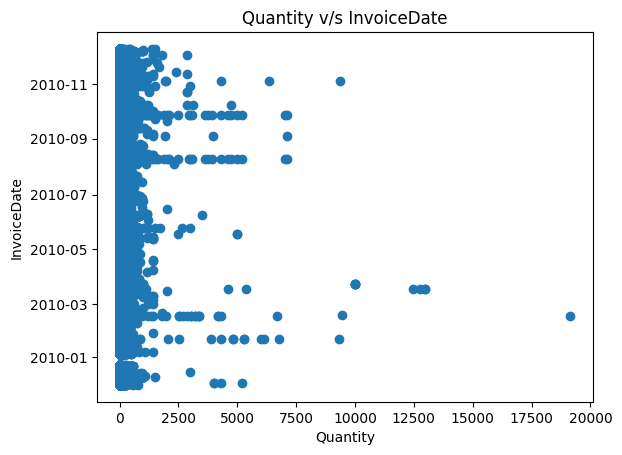

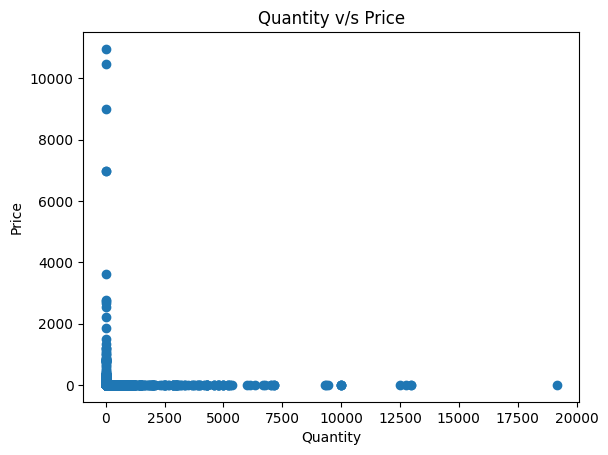

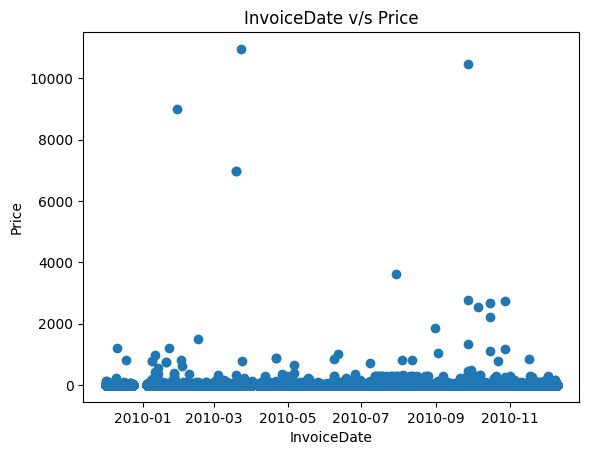

## Correlation:

C:\Users\Mathias\AppData\Local\Temp\ipykernel_12108\2390459975.py:21: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



## Missing Matrix:

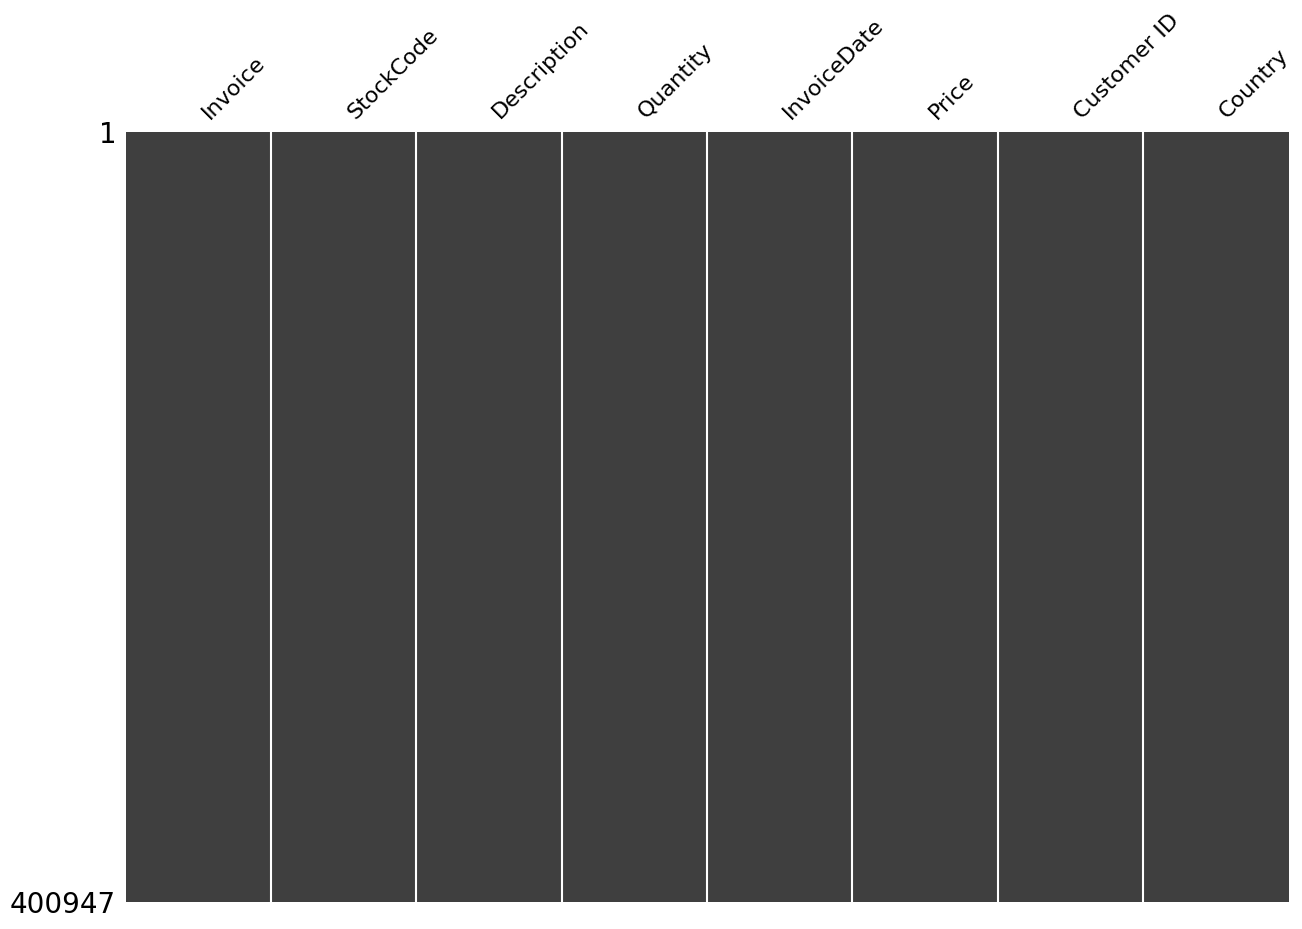

In [164]:
profile_df(df_limpio)

**Respuesta**: Como se puede, ya no se presentan los valores negativos para los gráficos de 'Quantity' y 'Price' en el análisis univariado y multivariado, por lo cual se ve información de los datos con más sentido, y por ende, los gráficos con más sentido, además que se eliminaron datos duplicados y con valores nulos, por lo cual se cambió las distribuciones en los datos, tambien al final podemos ver que ya no presentamos valores nulos en la columna 'Customer ID'

### 1.2.4 Obtención de TOPs [0.75 ptos]

Sin considerar los comentarios realizados en la sección 1.2 , *Don Mora* les pide obtener el **Top de 30 productos que generan más ganancias** para la tienda de retail. Deben considerar todo el registro temporal presente en el dataset y entregar la información en un gráfico de barras de los ingresos/cantidades v/s el nombre de los productos (Utilice `plotly`). ¿Los artículos más vendidos son los mismos que generan más ganancias?, Comente los resultados obtenidos.

**Resultados:**

In [175]:
df_limpio['Ingresos'] = df_limpio['Quantity'] * df_limpio['Price']

top_30_productos = df_limpio.groupby('Description')[['Ingresos', 'Quantity']].sum().nlargest(30, columns='Ingresos').reset_index()

fig = px.bar(top_30_productos, x='Description', y=['Ingresos', 'Quantity'])
fig.update_xaxes(categoryorder='total descending')

fig.show()

Podemos ver que no necesariamente se tiene que los astículos más vendidos son los que generan más ingresos, un ejemplo de esto es el artículo 'Manual' el cual a vendio menos que el artículo 'ASSORTED COLOUR BIRD ORNAMENT' pero generó más ingresos que este, este fenómeno se puede ver en más artículos a medida que se desciende en el top, pero con notoria menor diferencia.

### 1.2.5 Visualización del registro temporal [0,75 ptos]

El dueño del retail en su afán por saber más sobre los datos de su firma les solicita que grafiquen las ventas respecto al tiempo. Con esto les aclara que durante el día tienen muchas variaciones en sus ventas, por lo que les recomienda que consideren el registro temporal como `año-mes-día`. ¿Es posible observar datos extraños?, Comente lo que observa del gráfico.

In [165]:
def plot_ventas(dataframe):
    """Función que grafica las ventas en el rango de fechas año-mes-día del dataframe ingresado.

    Args:
        dataframe (Dataframe): Dataframe que contiene los datos de las ventas y fechas en formato datetime.
    """
    df = dataframe.copy()

    df['InvoiceDate'] = df['InvoiceDate'].dt.strftime('%Y-%m-%d')
    
    df_temporal = (df.groupby('InvoiceDate')
                   .agg({"Price":["mean", "std"]})
                   .sort_values("InvoiceDate")
                   .reset_index()
    )

    df_temporal.columns = ['InvoiceDate', 'PriceMean', 'PriceStd']

    fig = px.line(
    df_temporal,
    y="PriceMean",
    x="InvoiceDate",
    )

    fig.show()

In [166]:
plot_ventas(df_limpio)

Se puede ver que hay 4 peaks notorios de precios promedio, 1 el 29 de enero, 2 en marzo, día 19 y 23, y por último el día 27 de septiembre, estos sucesos presentan una gran diferencia de precio promedio comparados con los demás día del año, donde se ronda entre los valores de 5 y 2.5. Tambien se puede ver que tiene precios promedios bastantes establecidos, excepto en el mes de enero, donde se presentó mayor varianza en el precio promedio.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>